This notebook handles some exploratory data analysis on the combined dataset.

In [1]:
import os
import time
import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Change plotting style
import matplotlib
matplotlib.style.use("ggplot")

### Load the Data

In [7]:
data = pd.read_csv("../data/SFPD_Crime_Data_Concatenated.csv")
data.drop(columns=["Unnamed: 0"], inplace=True)
data.head()

,Category,Day of Week,Date,Time,District,Longitude,Latitude
0,WARRANTS,FRIDAY,07/01/2011,08:00,NORTHERN,-122.439758,37.802151
1,DRUG/NARCOTIC,TUESDAY,10/18/2005,14:30,TENDERLOIN,-122.414318,37.779944
2,VEHICLE THEFT,SATURDAY,01/29/2005,13:45,BAYVIEW,-122.388799,37.737576
3,NON-CRIMINAL,THURSDAY,06/02/2011,02:52,CENTRAL,-122.414354,37.803109
4,VEHICLE THEFT,SATURDAY,02/01/2003,08:00,BAYVIEW,-122.401097,37.724556


### Explore Day of Week Data

Let's explore the distribution of crimes, based on the day of the week.

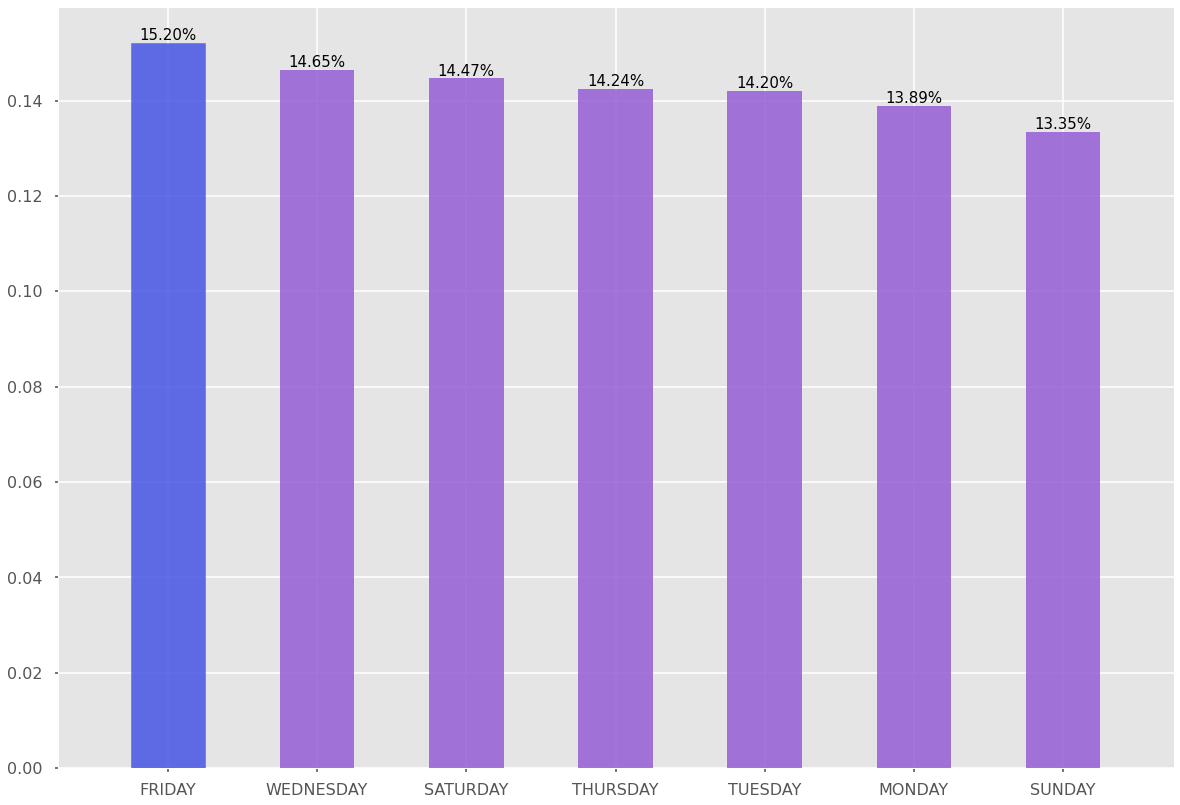

In [37]:
# Utility function
def change_bar_width(ax, new_width):
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_width
        patch.set_width(new_width)
        patch.set_x(patch.get_x() + diff * 0.5)

# Obtain the distribution of crimes, bsaed on the day of the week.
crimes_dow = data["Day of Week"].value_counts()
total_crimes = crimes_dow.sum()

crimes_dow = pd.DataFrame(crimes_dow).reset_index()
crimes_dow.columns = ["Day of Week", "Count"]
crimes_dow["Count"] = crimes_dow["Count"].apply(lambda x : x / total_crimes)

# Plot the distribution of crimes based on the day of the week.
plt.rcParams["figure.figsize"] = (20, 14)
barplot = plt.bar(crimes_dow["Day of Week"], crimes_dow["Count"], color="#945dd4", alpha=0.85)
change_bar_width(barplot, 0.50)
barplot[0].set_color("#4653e4")

# Plot the percentages on top of the bars.
for bar in barplot:
    height = bar.get_height()
    height_percent = height * 100
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, "{:.2f}%".format(height_percent), ha="center", va="bottom", fontsize=15)

It looks like Friday is host to the highest number of crimes, and Sunday is host to the least number of crimes.